In [1]:
from educe.stac.util.situated_stats import *
# edit with your own local path to the STAC data, and existing or desired base dir for the dump
STAC_DATA_DIR = '/home/mmorey/melodi/stac/svn-stac/data'
DUMP_DIR_SITU = '/tmp/stac_dump_situ'  # dumps will be into subdir 'csv' or 'pickle', depending on format
ALREADY_DUMPED = True  # if True, we assume the corpus has already been dumped to DUMP_DIR_SITU

In [2]:
if not ALREADY_DUMPED:
    corpus_dfs_situ = read_corpus_as_dataframes(STAC_DATA_DIR, version='situated', split='all',
                                                strip_cdus=True, attach_len=True)
    dump_corpus_dataframes(corpus_dfs_situ, DUMP_DIR_SITU, out_fmt='csv')

In [3]:
# read the data from the dump
dfs = load_corpus_dataframes(DUMP_DIR_SITU, dump_fmt='csv')
turns_situ = dfs[0]
turns_situ[:5]

,global_id,doc,subdoc,stage,annotator,type,span_beg,span_end,text,creation_date,author,last_modif_date,last_modifier,timestamp,turn_id,emitter,developments,resources,comments
0,s2-league5-game1_01_stac_1496239933,s2-league5-game1,1,discourse,GOLD,NonplayerTurn,1,38,0.0.1 : UI : zorburt joined the game.,1496239933,stac,0,n/a,19:58:55:712,0.0.1,UI,NaN,NaN,Please write in remarks...
1,s2-league5-game1_01_stac_1496239936,s2-league5-game1,1,discourse,GOLD,NonplayerTurn,39,81,0.0.2 : UI : catanstrophe joined the game.,1496239936,stac,0,n/a,19:58:57:859,0.0.2,UI,NaN,NaN,Please write in remarks...
2,s2-league5-game1_01_stac_1496239939,s2-league5-game1,1,discourse,GOLD,NonplayerTurn,82,122,0.0.3 : UI : zorburt sat down at seat 1.,1496239939,stac,0,n/a,19:58:58:307,0.0.3,UI,NaN,NaN,Please write in remarks...
3,s2-league5-game1_01_stac_1496239942,s2-league5-game1,1,discourse,GOLD,NonplayerTurn,123,149,0.0.4 : UI : Game state 0.,1496239942,stac,0,n/a,19:58:58:308,0.0.4,UI,NaN,NaN,Please write in remarks...
4,s2-league5-game1_01_stac_1496239945,s2-league5-game1,1,discourse,GOLD,NonplayerTurn,150,191,0.0.5 : UI : raefbrisbin joined the game.,1496239945,stac,0,n/a,19:59:00:525,0.0.5,UI,NaN,NaN,Please write in remarks...


In [4]:
disc_rels_situ = dfs[6]
disc_rels_situ[:5]

,global_id,doc,subdoc,stage,annotator,type,creation_date,author,last_modif_date,last_modifier,arg_scope,comments,source,target,len_seg,len_edu,len_eeu
0,s2-league5-game1_01_asoubeille_1414136334458,s2-league5-game1,1,discourse,GOLD,Comment,1414136334458,asoubeille,0,n/a,Please choose...,Please write in remarks...,s2-league5-game1_01_stac_1496239940,s2-league5-game1_01_stac_1413792984,8,NaN,NaN
1,s2-league5-game1_01_asoubeille_1414136350492,s2-league5-game1,1,discourse,GOLD,Result,1414136350492,asoubeille,0,n/a,Specified,Please write in remarks...,s2-league5-game1_01_stac_1413792987,s2-league5-game1_01_stac_1413792988,1,1.0,NaN
2,s2-league5-game1_01_asoubeille_1414136518374,s2-league5-game1,1,discourse,GOLD,Parallel,1414136518374,asoubeille,0,n/a,Please choose...,Please write in remarks...,s2-league5-game1_01_stac_1413792984,s2-league5-game1_01_stac_1413792991,3,3.0,NaN
3,s2-league5-game1_01_asoubeille_1414136538768,s2-league5-game1,1,discourse,GOLD,Comment,1414136538768,asoubeille,0,n/a,Unspecified,Please write in remarks...,s2-league5-game1_01_stac_1413792991,s2-league5-game1_01_stac_1413792994,5,1.0,NaN
4,s2-league5-game1_01_asoubeille_1414136598956,s2-league5-game1,1,discourse,GOLD,Comment,1414136598956,asoubeille,0,n/a,Please choose...,Please write in remarks...,s2-league5-game1_01_stac_1413792997,s2-league5-game1_01_stac_1413793000,9,1.0,NaN


In [5]:
# (abs(disc_rels_situ['len_seg']).value_counts() / disc_rels_situ['len_seg'].count())[:15]

In [6]:
# (abs(disc_rels_situ['len_edu']).value_counts() / disc_rels_situ['len_edu'].count())[:15]

In [7]:
%matplotlib inline
import numpy as np
import matplotlib as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_context("paper")
sns.set(rc={"figure.figsize": (18, 4)})

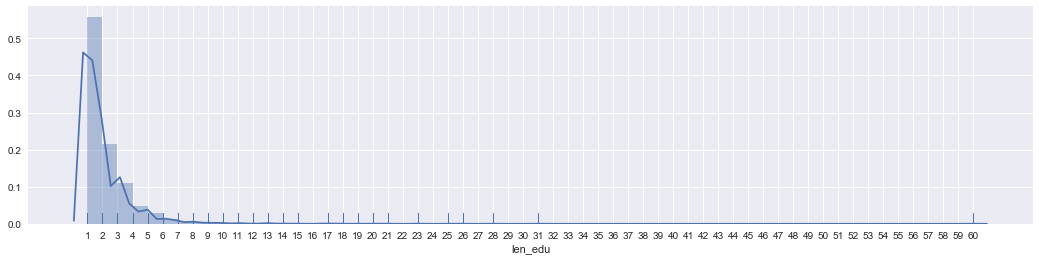

In [8]:
abs_len_edu = abs(disc_rels_situ['len_edu'])
abs_len_edu = abs_len_edu[abs_len_edu.notnull()].astype(int)
bins = np.arange(abs_len_edu.min(), abs_len_edu.max() + 1)
len_dist = sns.distplot(abs_len_edu, bins=bins, rug=True)
len_dist.set(xticks=bins)
len_dist

Get the list of situated games.

In [9]:
# games_situ = list(turns_situ['doc'].unique())

Read the linguistic (here, spect) version of the corpus.

In [10]:
# turns_spect, dlgs_spect, segs_spect, acts_spect, schms_spect, schm_mbrs_spect, disc_rels_spect, res_spect, pref_spect, unit_rels_spect = read_corpus_as_dataframes(version='ling', split='all', sel_games=games_situ)